In [14]:
! pip install mahotas

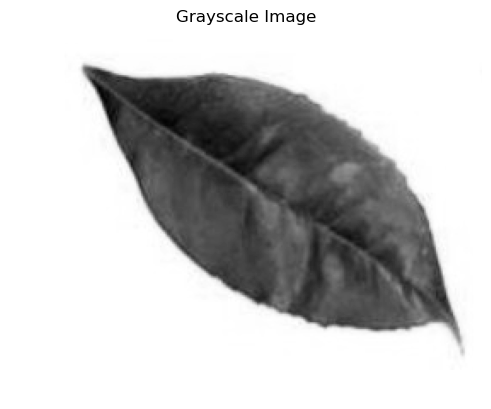

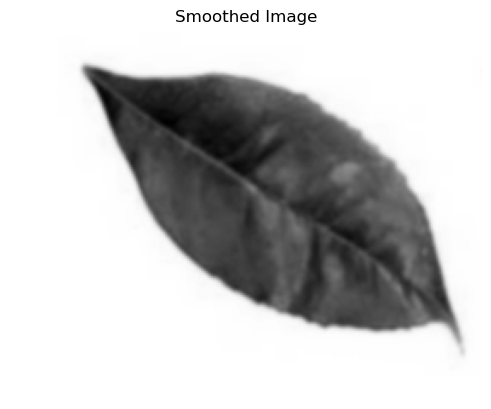

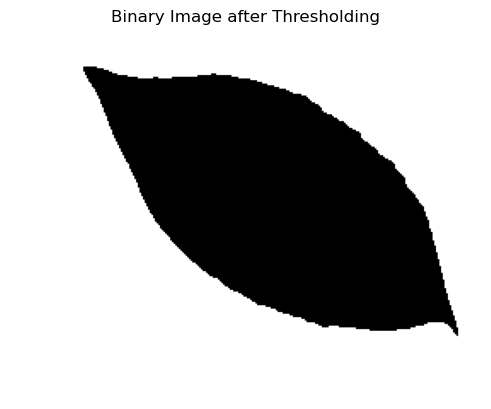

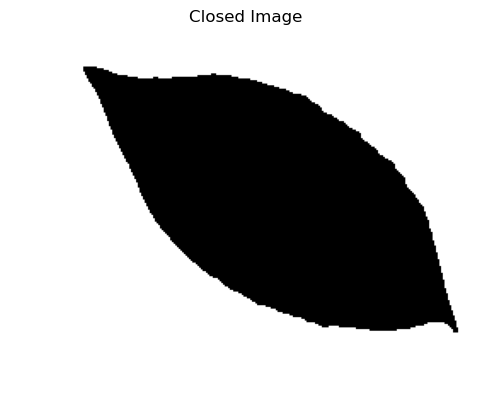

Shape Features: {'area': 39698, 'perimeter': 1632.2985565973347, 'aspect_ratio': 1.2768312880471335, 'rectangularity': 0.6604335457252658, 'circularity': 0.18723166450857445}
Color Features: {'mean_r': 197.31522733700444, 'std_r': 79.28092659989348, 'mean_g': 223.96113726729774, 'std_g': 43.41344299677951, 'mean_b': 186.4003061105658, 'std_b': 93.5577761394411}
Texture Features: {'contrast': 43.09859485092399, 'correlation': 0.9939756034178482, 'inverse_difference_moments': 0.6904230919038131, 'entropy': 5.888682334886265}


In [19]:
# Importing necessary libraries
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage.filters import threshold_otsu
from skimage import img_as_ubyte
from skimage.morphology import closing, square
from skimage.measure import regionprops, find_contours
import mahotas
import matplotlib.pyplot as plt
import os

# Function to convert RGB to Grayscale
def convert_to_grayscale(image_path):
    img = Image.open(image_path)
    grayscale_img = img.convert("L")
    return np.array(grayscale_img)

# Function to smooth the image using Gaussian filter
def smooth_image(image_array, sigma=1):
    return gaussian_filter(image_array, sigma=sigma)

# Function for adaptive thresholding
def apply_threshold(image_array):
    thresh_value = threshold_otsu(image_array)
    binary_image = image_array > thresh_value
    return img_as_ubyte(binary_image)

# Function to close holes using morphological transformations
def close_holes(binary_image):
    return closing(binary_image, square(3))

# Function to extract contours
def extract_contours(binary_image):
    return find_contours(binary_image, level=0.8)

# Function to extract shape-based features
def extract_shape_features(binary_image):
    props = regionprops(binary_image.astype(int))
    if props:
        prop = props[0]  # Consider the largest object
        features = {
            "area": prop.area,
            "perimeter": prop.perimeter,
            "aspect_ratio": prop.major_axis_length / prop.minor_axis_length,
            "rectangularity": prop.area / (prop.bbox_area),
            "circularity": 4 * np.pi * (prop.area / (prop.perimeter ** 2))
        }
        return features
    return {}

# Function to extract color-based features
def extract_color_features(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    r, g, b = img_array[..., 0], img_array[..., 1], img_array[..., 2]
    features = {
        "mean_r": np.mean(r),
        "std_r": np.std(r),
        "mean_g": np.mean(g),
        "std_g": np.std(g),
        "mean_b": np.mean(b),
        "std_b": np.std(b),
    }
    return features

# Function to extract texture-based features
def extract_texture_features(gray_image):
    features = mahotas.features.haralick(gray_image).mean(axis=0)
    return {
        "contrast": features[1],
        "correlation": features[2],
        "inverse_difference_moments": features[4],
        "entropy": features[8]
    }

image_path = "../assets/test.jpg"

# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: The file at path {image_path} does not exist.")
else:
    # Convert image to grayscale and display it
    gray_image = convert_to_grayscale(image_path)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')
    plt.show()

    # Smooth the image and display it
    smoothed_image = smooth_image(gray_image)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title("Smoothed Image")
    plt.axis('off')
    plt.show()

    # Apply thresholding and display it
    binary_image = apply_threshold(smoothed_image)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image after Thresholding")
    plt.axis('off')
    plt.show()

    # Close holes and display it
    closed_image = close_holes(binary_image)
    plt.imshow(closed_image, cmap='gray')
    plt.title("Closed Image")
    plt.axis('off')
    plt.show()

    # Extract shape features
    shape_features = extract_shape_features(closed_image)
    print("Shape Features:", shape_features)

    # Extract color features
    color_features = extract_color_features(image_path)
    print("Color Features:", color_features)

    # Extract texture features
    texture_features = extract_texture_features(gray_image)
    print("Texture Features:", texture_features)
